In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# plt.rcParams['svg.fonttype'] = 'none'

In [2]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

In [3]:
def CalcPQFromUMICnts(raw_cnts):
    PQ_prop = []
    PQ_Ctrl_normed = []
    for i in range(len(raw_cnts)):
        PQ_prop.append([x / sum(raw_cnts[i]) for x in raw_cnts[i]])
        PQ_Ctrl_normed.append([x / (raw_cnts[i][7] + raw_cnts[i][8]) for x in raw_cnts[i]])

    PQ_prop_avg = []
    PQ_Ctrl_normed_avg = []
    for i in range(len(raw_cnts[0])):
        curr_col = [x[i] for x in PQ_prop]
        PQ_prop_avg.append(np.mean(curr_col))

        curr_norm_col = [x[i] for x in PQ_Ctrl_normed]
        PQ_Ctrl_normed_avg.append(np.mean(curr_norm_col))

    return PQ_prop, PQ_prop_avg, PQ_Ctrl_normed, PQ_Ctrl_normed_avg

In [4]:
# Numbers migrated from outputs of running PQSeq_Data_Analysis.py; see below for the annotation of samples
Additional_PQ_raw = [
    [44374,452002,496,70,102,227,193,99,126,2110,39,86],
    [53484,519109,585,70,102,264,237,141,174,2459,56,93],
    [59622,511297,636,98,135,250,218,128,188,2567,72,103],
    [56591,591830,823,80,119,257,263,118,163,3299,85,115],
    [2090,89,68,94012,158884,204588,82,81,210,79,16,23],
    [1941,86,37,95373,161076,205009,60,69,201,69,23,16],
    [1737,98,50,91819,154750,197033,70,93,189,72,16,33],
    [1788,192,80,99862,170826,211976,91,86,182,73,31,28],
    [46855,38464,142166,53942,104091,259299,16107,26253,82261,19660,5223,11376],
    [49152,39099,157179,57877,102376,263775,15992,27316,88252,20140,5540,12413],
    [47420,131649,56191,40696,87545,172618,13845,23034,71735,76936,16716,7171],
    [40792,122894,48935,34925,75659,159323,11973,20206,64558,65007,13249,6176],
    [39674,139657,30545,32063,71195,125164,11032,18057,56712,86766,15819,5168],
    [42184,160688,39788,35549,77414,141042,11820,19324,60925,91880,17524,5660],
    [49707,204790,11314,37585,82189,130389,13442,22042,68724,135835,25953,5549],
    [47659,207917,10372,34761,75632,123321,12134,19596,60765,132148,23736,5288],
]

all_PQ_avg = []
all_PQ_ctrl_normed_avg = []
for idx in range(len(Additional_PQ_raw)):
    curr_PQ_prop, curr_PQ_avg, curr_PQ_ctrl_normed, curr_PQ_ctrl_normed_avg = CalcPQFromUMICnts([Additional_PQ_raw[idx]])
    all_PQ_avg.append(curr_PQ_avg)
    all_PQ_ctrl_normed_avg.append(curr_PQ_ctrl_normed_avg)

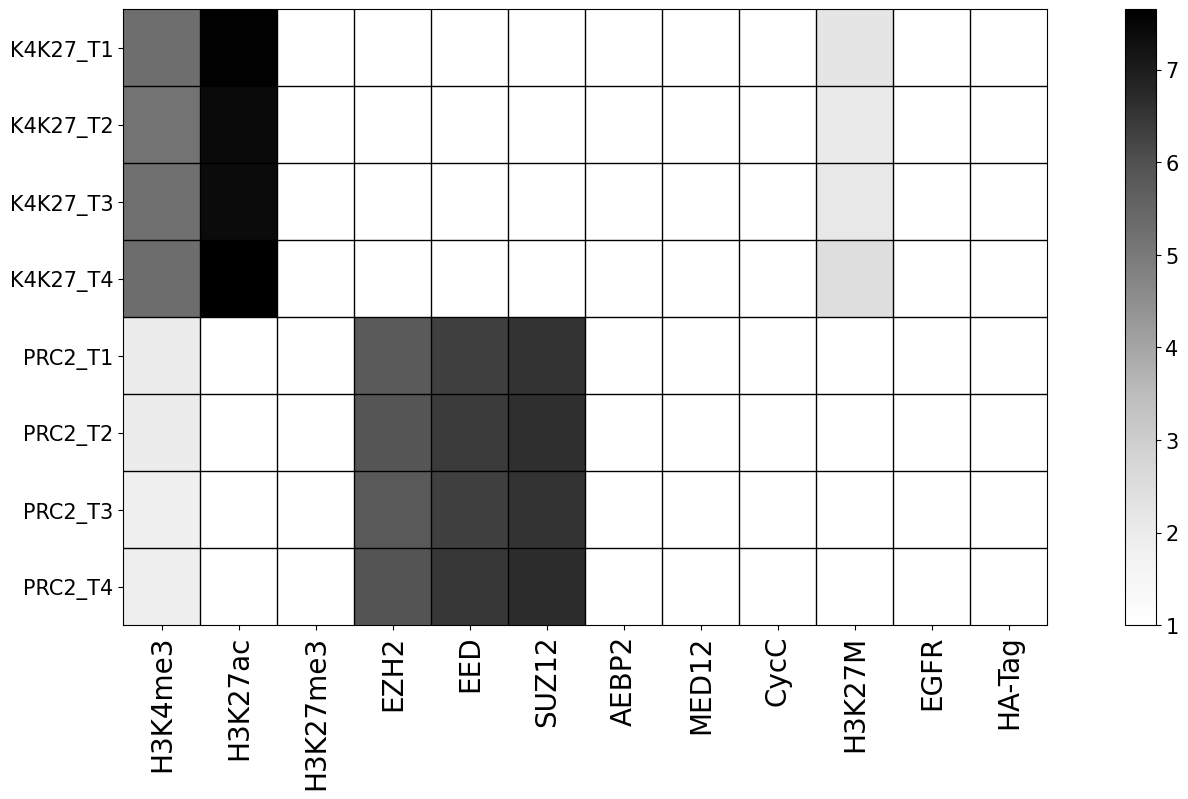

In [5]:
# Multiple plots together as one figure; Prod263
plot_data = (np.log(all_PQ_ctrl_normed_avg))[0:8]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

y_labels = [
    "K4K27_T1",
    "K4K27_T2",
    "K4K27_T3",
    "K4K27_T4",
    "PRC2_T1",
    "PRC2_T2",
    "PRC2_T3",
    "PRC2_T4",
    "HEKWT_3_0_DIPG36_T1",
    "HEKWT_3_0_DIPG36_T2",
    "HEKWT_2_1_DIPG36_T1",
    "HEKWT_2_1_DIPG36_T2",
    "HEKWT_1_2_DIPG36_T1",
    "HEKWT_1_2_DIPG36_T2",
    "HEKWT_0_3_DIPG36_T1",
    "HEKWT_0_3_DIPG36_T2",
]

im = ax.imshow(plot_data, cmap = "Greys", vmin = 1)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[0:8], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Recomb_PQ_logctrlnorm.svg", dpi = 1200)

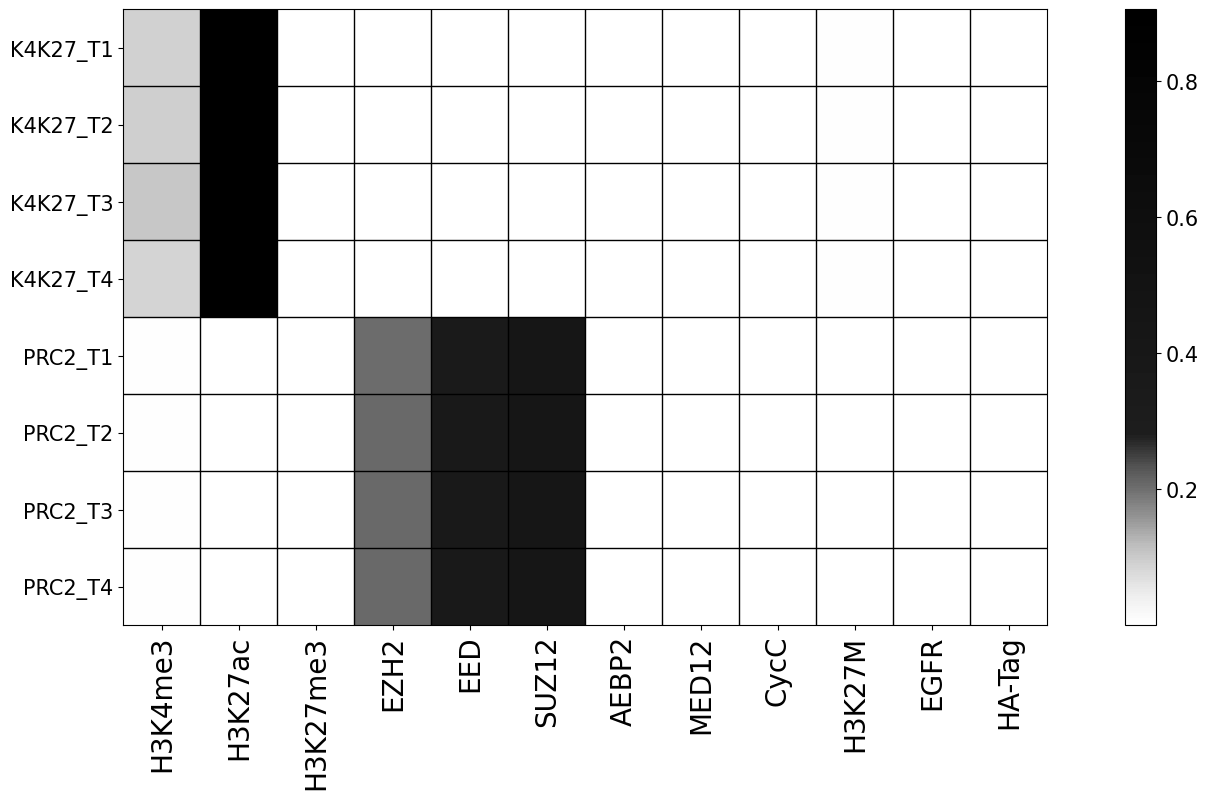

In [6]:
# Multiple plots together as one figure; Prod263
color_thres_num = 80
colors1 = plt.cm.Greys(np.linspace(0, 0.9, color_thres_num))
colors2 = plt.cm.Greys(np.linspace(0.9, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

plot_data = ((all_PQ_avg))[0:8]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

y_labels = [
    "K4K27_T1",
    "K4K27_T2",
    "K4K27_T3",
    "K4K27_T4",
    "PRC2_T1",
    "PRC2_T2",
    "PRC2_T3",
    "PRC2_T4",
    "HEKWT_3_0_DIPG36_T1",
    "HEKWT_3_0_DIPG36_T2",
    "HEKWT_2_1_DIPG36_T1",
    "HEKWT_2_1_DIPG36_T2",
    "HEKWT_1_2_DIPG36_T1",
    "HEKWT_1_2_DIPG36_T2",
    "HEKWT_0_3_DIPG36_T1",
    "HEKWT_0_3_DIPG36_T2",
]

im = ax.imshow(plot_data, cmap = customized_cmap)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[0:8], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Recomb_PQ_depthnorm.svg", dpi = 1200)

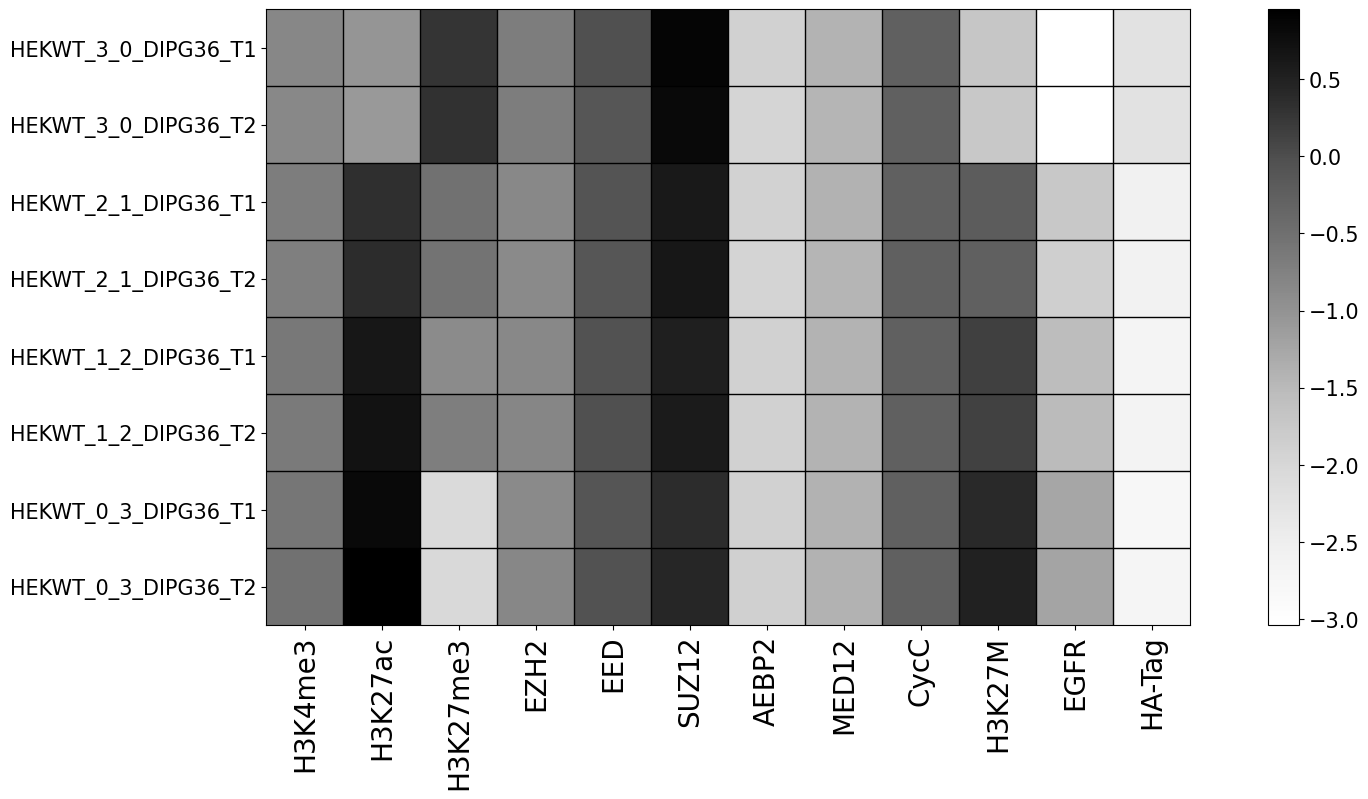

In [7]:
# Multiple plots together as one figure; Prod263
plot_data = (np.log(all_PQ_ctrl_normed_avg))[8:16]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

y_labels = [
    "K4K27_T1",
    "K4K27_T2",
    "K4K27_T3",
    "K4K27_T4",
    "PRC2_T1",
    "PRC2_T2",
    "PRC2_T3",
    "PRC2_T4",
    "HEKWT_3_0_DIPG36_T1",
    "HEKWT_3_0_DIPG36_T2",
    "HEKWT_2_1_DIPG36_T1",
    "HEKWT_2_1_DIPG36_T2",
    "HEKWT_1_2_DIPG36_T1",
    "HEKWT_1_2_DIPG36_T2",
    "HEKWT_0_3_DIPG36_T1",
    "HEKWT_0_3_DIPG36_T2",
]

im = ax.imshow(plot_data, cmap = "Greys")
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[8:16], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Mixing_PQ_logctrlnorm.svg", dpi = 1200)

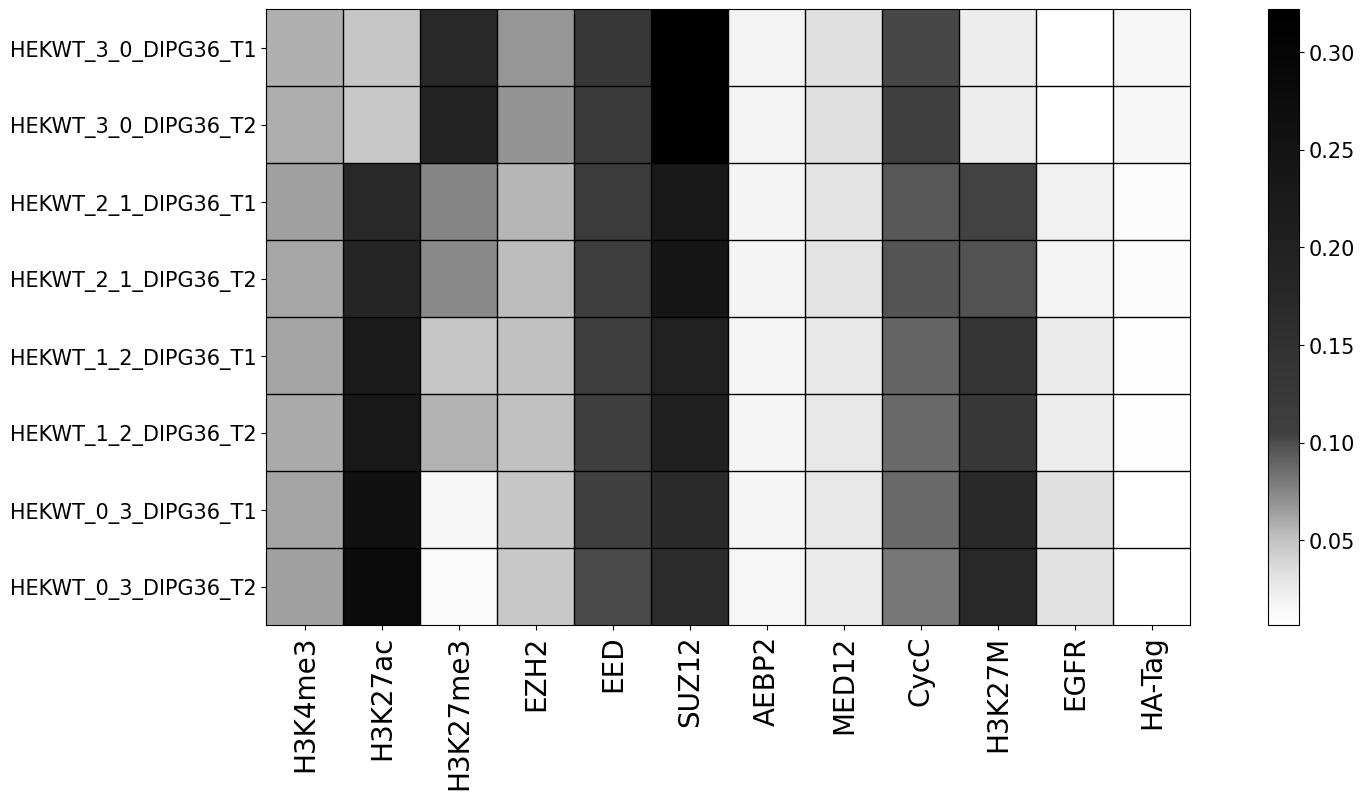

In [8]:
color_thres_num = 80
colors1 = plt.cm.Greys(np.linspace(0, 0.8, color_thres_num))
colors2 = plt.cm.Greys(np.linspace(0.8, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Multiple plots together as one figure; Prod263
plot_data = all_PQ_avg[8:16]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

y_labels = [
    "K4K27_T1",
    "K4K27_T2",
    "K4K27_T3",
    "K4K27_T4",
    "PRC2_T1",
    "PRC2_T2",
    "PRC2_T3",
    "PRC2_T4",
    "HEKWT_3_0_DIPG36_T1",
    "HEKWT_3_0_DIPG36_T2",
    "HEKWT_2_1_DIPG36_T1",
    "HEKWT_2_1_DIPG36_T2",
    "HEKWT_1_2_DIPG36_T1",
    "HEKWT_1_2_DIPG36_T2",
    "HEKWT_0_3_DIPG36_T1",
    "HEKWT_0_3_DIPG36_T2",
]

im = ax.imshow(plot_data, cmap = customized_cmap)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[8:16], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Mixing_PQ_depthnorm.svg", dpi = 1200)

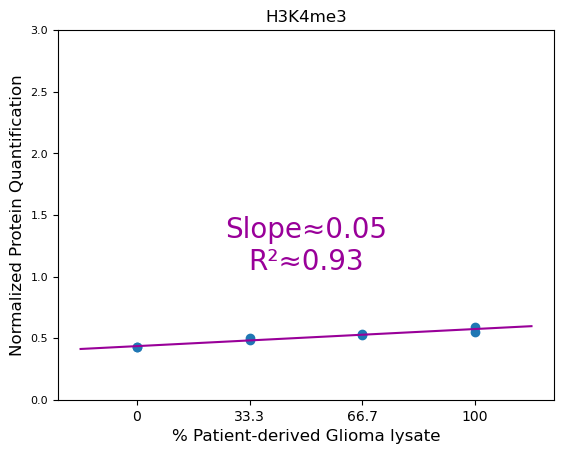

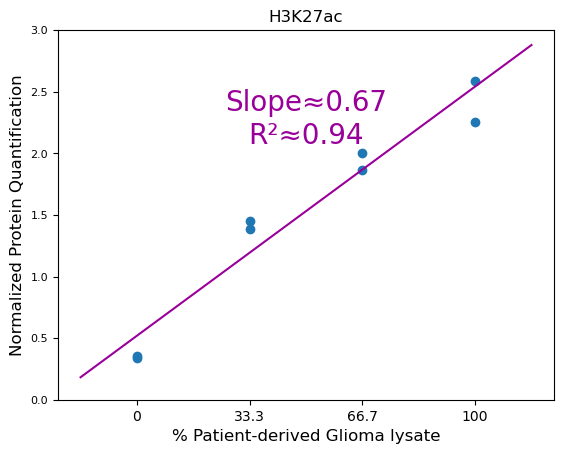

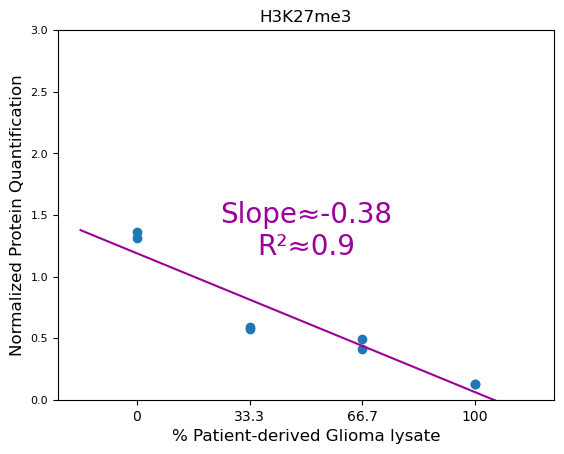

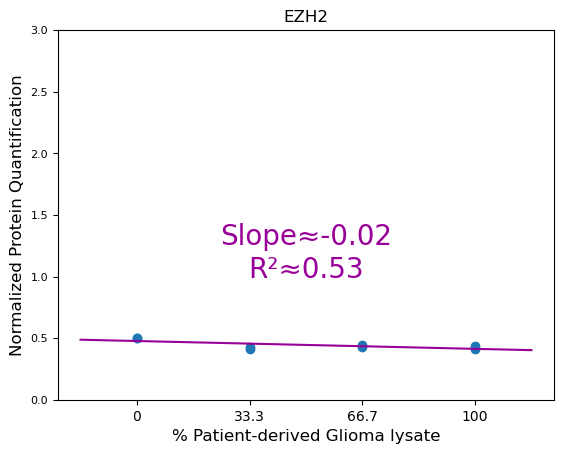

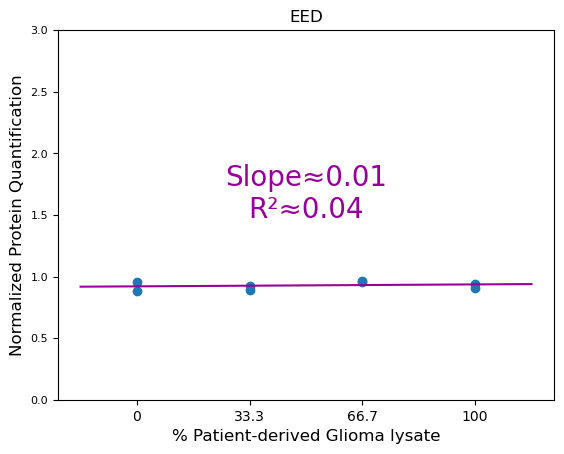

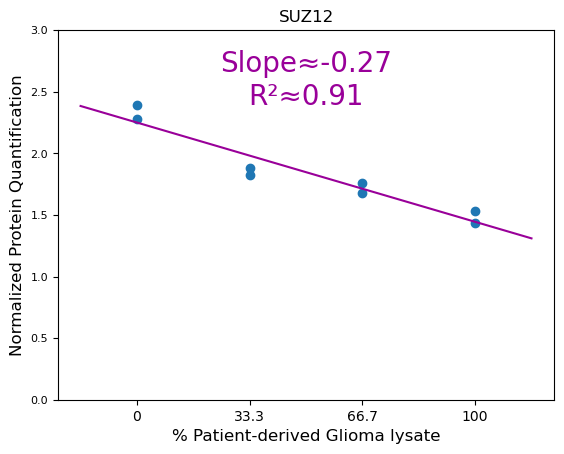

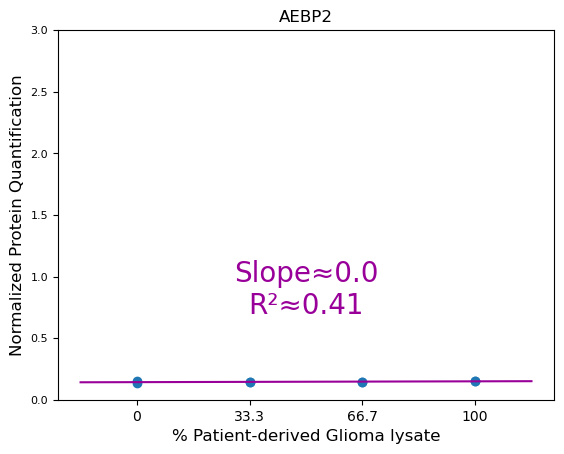

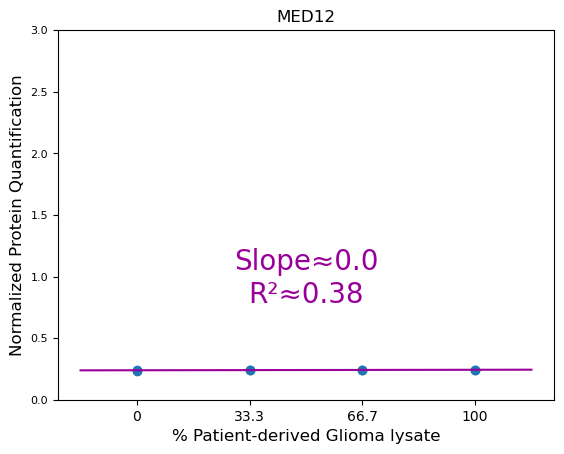

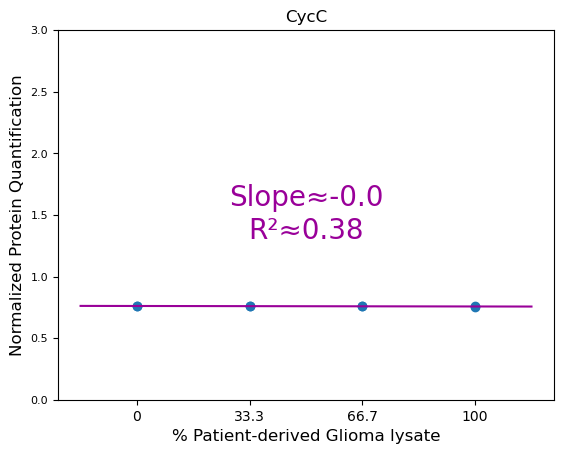

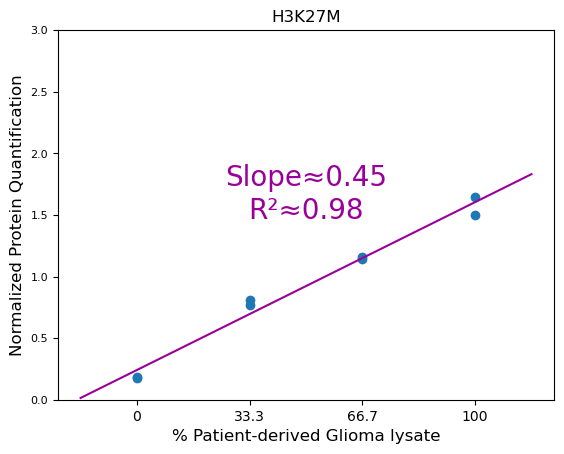

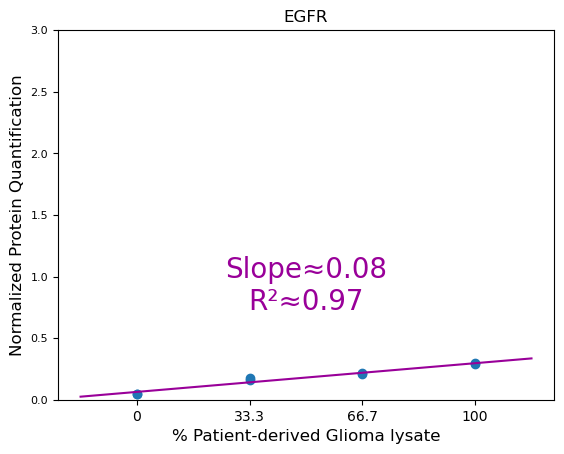

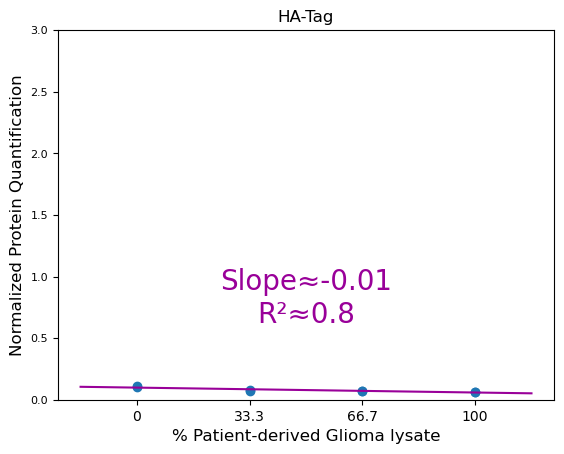

In [9]:
from sklearn.linear_model import LinearRegression

PQ_all_regs = []
for protein_idx in range(len(all_PQ_ctrl_normed_avg[0])):
    fig = plt.figure()
    plt.title(plot_barcodes[protein_idx])
    plt.ylim(0, 3)
    curr_data = [x[protein_idx] for x in all_PQ_ctrl_normed_avg[8:16]]

    curr_xvec = [[1], [1], [2], [2], [3], [3], [4], [4]]
    reg = LinearRegression().fit(curr_xvec, curr_data)
    plt.scatter(curr_xvec, curr_data)
    plt.xlabel("% Patient-derived Glioma lysate", fontsize = 12)
    plt.ylabel("Normalized Protein Quantification", fontsize = 12)
    plt.xticks([1, 2, 3, 4], labels = ["0", "33.3", "66.7", "100"], fontsize = 10)
    plt.yticks(fontsize = 8)

    plt.plot([0.5, 4.5], [0.5 * (reg.coef_)[0] + reg.intercept_, 4.5 * (reg.coef_)[0] + reg.intercept_],
              color = (0.6, 0, 0.6))

    plt.text(2.5, 2.5 * (reg.coef_)[0] + reg.intercept_ + 0.5,
               "Slope\u2248" + str(round(reg.coef_[0], 2)) + "\n" + "R\u00B2\u2248" + str(round(reg.score(curr_xvec, curr_data), 2)),
              color = (0.6, 0, 0.6), fontsize = 20, ha = "center", va = "bottom")

    PQ_all_regs.append([
        reg.coef_[0], reg.score(curr_xvec, curr_data), plot_barcodes[protein_idx]
    ])
    # fig.savefig(plot_barcodes[protein_idx] + "_PQLinReg.svg", dpi = 1200)

Text(0.5, 0.02, 'Patient-derived Glioma')

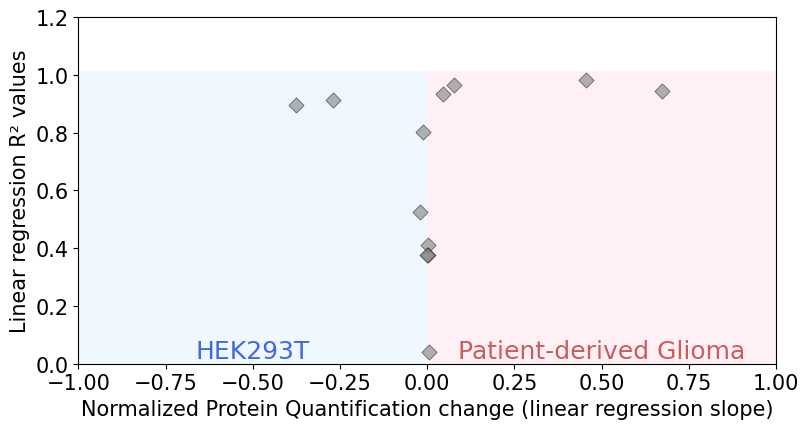

In [10]:

fig, ax = plt.subplots(figsize = (9, 4.5))
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1.2)
ax.fill_between([-1.3, 0], [1.015, 1.015], color = "aliceblue")
ax.fill_between([0, 1.3], [1.015, 1.015], color = "lavenderblush")

ax.scatter([x[0] for x in PQ_all_regs], [x[1] for x in PQ_all_regs], color = "Grey", alpha = 0.6,
          s = 60, edgecolor = "black", linewidths = 0.5, marker = "D")

ax.set_xlabel("Normalized Protein Quantification change (linear regression slope)", fontsize = 15)
ax.set_ylabel("Linear regression R\u00B2 values", fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.text(-0.5, 0.02, "HEK293T", fontsize = 18, ha = "center", color = "royalblue")
plt.text(0.5, 0.02, "Patient-derived Glioma", fontsize = 18, ha = "center", color = "indianred")

# fig.savefig("PQ_R2_volcano.svg", dpi = 1200)